In [10]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Primeiros passos com a Vertex AI PaLM API e Python SDK

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Execute no Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      Veja no GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Execute no Vertex AI Workbench
    </a>
  </td>
</table>

## Visão geral

### O que são LLMs?
Modelos de linguagem grandes (ou *Large Language Models* ou simplesmente *LLMs*) são modelos de aprendizado profundo treinados em conjuntos de dados massivos de texto. Os LLMs podem traduzir linguagem, resumir texto, gerar escrita criativa, gerar código, capacitar chatbots e assistentes virtuais e complementar mecanismos de pesquisa e sistemas de recomendação.

### PaLM 2
Seguindo seu antecessor, [PaLM](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html), [PaLM 2](https://ai.google/ Discover/palm2) é um LLM do Google que se baseia nas pesquisas do Google em aprendizado de máquina e IA responsável. O PaLM 2 se destaca em tarefas como criação de textos, tradução e geração de código devido à forma como foi construído.

PaLM 2 [se destaca](https://ai.google/static/documents/palm2techreport.pdf) em tarefas como geração de código e tarefas matemática, classificação e respostas a perguntas, tradução e proficiência multilíngue e geração de linguagem natural melhor do que LLMs anteriores, incluindo PaLM. Ele pode realizar essas tarefas devido à forma como foi construído – reunindo dimensionamento otimizado para computação, uma mistura aprimorada de conjunto de dados e melhorias na arquitetura do modelo.

O PaLM 2 é baseado na abordagem do Google para criar e implantar IA de forma responsável. Ele foi avaliado rigorosamente para analisar possíveis danos e vieses, recursos e usos posteriores em pesquisas e aplicações em produtos. Ele está sendo usado em outros modelos de última geração, como Med-PaLM 2 e Sec-PaLM, e está alimentando recursos e ferramentas generativas de IA no Google, como Bard e a API PaLM.

O PaLM 2 é pré-treinado em uma ampla gama de dados de texto usando uma abordagem de aprendizado não supervisionado, sem nenhuma tarefa específica. Durante esse processo de pré-treinamento, o PaLM aprende a prever a próxima palavra em uma frase, considerando as palavras anteriores. Isso permite que o modelo gere texto coerente e fluente, semelhante à escrita humana.
Esse tamanho grande permite aprender padrões e relacionamentos complexos na linguagem e gerar texto de alta qualidade para vários aplicativos. É por isso que modelos como o PaLM são chamados de "modelos fundamentais".

A criação de um LLM requer grandes quantidades de dados, recursos de computação significativos e habilidades especializadas. Como os LLMs exigem um grande investimento para serem criados, eles visam casos de uso amplos e não específicos. Na Vertex AI, você pode personalizar um modelo de base para tarefas ou domínios de conhecimento mais específicos usando design de prompt e ajuste de modelo.

### Vertex AI PaLM API
A Vertex AI PaLM API, [lançada em 10 de maio de 2023](https://cloud.google.com/vertex-ai/docs/generative-ai/release-notes#may_10_2023), é desenvolvida com [PaLM 2]( https://ai.google/discover/palm2).

### Usando a API Vertex AI PaLM

Você pode interagir com a API Vertex AI PaLM usando os seguintes métodos:

* Use a UI da [Generative AI Studio](https://cloud.google.com/generative-ai-studio) para testes rápidos e geração de comandos.
* Faça chamadas REST no Cloud Shell.
* Use o Python SDK em um notebook Jupyter

Este notebook se concentra no uso do Python SDK para chamar a Vertex AI PaLM API. Para obter mais informações sobre como usar o Generative AI Studio sem escrever código, você pode explorar [Introdução às instruções da interface do usuário](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_ui.md)

Para obter mais informações, confira a [documentação sobre suporte de IA generativa para Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objetivos

Neste tutorial, você aprenderá como usar a API PaLM 2 com o Python SDK e explorar seus vários parâmetros.

Ao final do notebook, você será capaz de entender várias nuances de parâmetros de modelo generativo como `top_k`, `top_p`, `temperature`,  e como cada parâmetro afeta os resultados.

As etapas realizadas incluem:

- Instalando o Python SDK
- Usando a API Vertex AI PaLM
   - Modelo de geração de texto com `text-bison@001`
     - Entendendo os parâmetros do modelo (`temperature`, `max_output_tokens`, `top_k`, `top_p`)
   - Modelo de chat com `chat-bison@001`
   - Modelo de embeddings com `textembedding-gecko@001`

### Custos
Este tutorial usa os seguintes componentes de Google Cloud:

* Vertex AI Generative AI Studio

Saiba mais sobre possíveis custos envolvidos [preços da Vertex AI](https://cloud.google.com/vertex-ai/pricing),
e use a [Calculadora de preços](https://cloud.google.com/products/calculator/)
para gerar uma estimativa de custo com base no uso projetado.

### Segurança de dados
**P: O Google usa dados de clientes para melhorar seus modelos de base?**
R: Não, o Google não usa dados de clientes para melhorar os modelos de fundação. Os dados do cliente são usados apenas para gerar uma resposta do modelo.

**P: Os funcionários do Google veem os dados que envio ao modelo?**
R: Não, os funcionários do Google não têm acesso aos dados do cliente e todos os dados são criptografados em trânsito, em uso e em repouso.

**P: O Google armazena algum dos dados do cliente que são enviados para o modelo?**
R: Não, o Google não armazena dados de clientes. No entanto, o Google pode armazenar em cache temporariamente os dados do cliente durante a solicitação, como pipeline de ajuste de prompt e uso em batch.

**P: O Google registra dados?**
R: Não, o Google não loga os dados dos clientes. Os logs do lado do sistema ajudam o Google a garantir a integridade e a disponibilidade do sistema.

### IA Responsável
LLMs podem traduzir linguagem, resumir texto, gerar escrita criativa, gerar código, chatbots e assistentes virtuais, além de complementar mecanismos de pesquisa e sistemas de recomendação. Ao mesmo tempo, como uma tecnologia em estágio inicial, seus recursos e usos em evolução podem criar aplicações incorretas, uso indevido e consequências não intencionais ou imprevistas. LLMs podem gerar resultados inesperados, incluindo texto ofensivo, insensível ou incorreto.

Além disso, a incrível versatilidade dos LLMs também é o que torna difícil prever exatamente que tipos de saídas não intencionais ou imprevistas eles podem produzir. Dados esses riscos e complexidades, a API PaLM foi projetada com os [AI Principles do Google](https://ai.google/principles/) em mente. No entanto, é importante que os desenvolvedores entendam e testem seus modelos para implantá-los com segurança e responsabilidade. Para ajudar os desenvolvedores, o Generative AI Studio possui filtragem de conteúdo integrada e a API PaLM possui pontuação de atributo de segurança para ajudar os clientes a testar os filtros de segurança do Google e definir limites de confiança adequados para seu caso de uso e negócios. Consulte a seção [Filtros e atributos de segurança](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) para saber mais.

Quando a API PaLM é integrada ao caso de uso e contexto exclusivos de um cliente, considerações adicionais de IA Responsável e [limitações PaLM](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai #palm_limitations) precisam ser considerados. Incentivamos os clientes a usar *fairness*, interpretabilidade, privacidade e segurança [práticas recomendadas](https://ai.google/responsabilidades/responsible-ai-practices/).

## Primeiros Passos

### Instalando os SDK da Vertex AI e da Cloud Translate API

In [11]:
# !pip install google-cloud-aiplatform --upgrade --user

**Somente Colab:** Descomente a célula a seguir para reiniciar o kernel ou use o botão para reiniciar o kernel.

In [12]:
# # Reinicia automaticamente o kernel após as instalações para que seu ambiente possa acessar os novos pacotes
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

### Autenticando seu ambiente de notebook
* Se você estiver usando o **Colab** para executar este notebook, descomente a célula abaixo e continue.
* Se você estiver usando o **Vertex AI Workbench**, confira as instruções de configuração [aqui](../setup-env/README.md).

In [13]:
# from google.colab import auth
# auth.authenticate_user()

## Modelos disponíveis na Vertex AI PaLM API

A Vertex AI PaLM API permite que você teste, personalize e implemente instâncias de LLM do Google, chamado PaLM, para que você possa aproveitar os recursos do PaLM em seus aplicativos.

### Nomenclatura dos modelos
Os nomes dos modelos de fundação têm três componentes: caso de uso, tamanho do modelo e número da versão. A convenção de nomenclatura está no formato:
`<caso de uso>-<tamanho do modelo>@<número da versão>`

Por exemplo, text-bison@001 representa o modelo de texto Bison, versão 001.

Os tamanhos dos modelos são os seguintes:
- **Bison**: O melhor valor em termos de capacidade e custo.
- **Gecko**: O modelo menor e mais barato para tarefas simples.

### Modelos disponíveis

Atualmente, a Vertex AI PaLM API oferece suporte a três modelos:

* `text-bison@001` : Ajustado para seguir instruções de linguagem natural e é adequado para uma variedade de tarefas de linguagem.
* `chat-bison@001`: Ajustado para casos de uso de conversas em vários turnos, como a construção de um chatbot.
* `textembedding-gecko@001` : Retorna incorporações de modelo para entradas de texto.

Você pode encontrar mais informações sobre as propriedades desses [modelos fundamentais na documentação do Generative AI Studio](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).

### Importando as bibliotecas necessárias

**Somente Colab:** Descomente a célula a seguir para realizar o processo adequado de inicialização da SDK da Vertex AI.  

In [14]:
# import vertexai

# PROJECT_ID = "[seu-project-id]"  # @param {type:"string"}
# vertexai.init(project=PROJECT_ID, location="us-central1")

In [15]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.preview.language_models import (ChatModel, InputOutputTextPair,
                                              TextEmbeddingModel,
                                              TextGenerationModel)

## Geração de texto com `text-bison@001`

O modelo de geração de texto da API PaLM que você usará neste notebook é `text-bison@001`.
Ele é ajustado para seguir instruções de linguagem natural e é adequado para uma variedade de tarefas de linguagem, como:

- Classificação
- Análise de sentimentos
- Extração de entidades
- Perguntas-respostas extrativas
- Resumo
- Reescrever o texto em um estilo diferente
- Geração de cópia do anúncio
- Ideação do conceito
- Simplificação do conceito

#### Carregando o modelo `text-bison`

In [16]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### Design de prompts
O design de prompts é o processo de criação de prompts que extraem a resposta desejada de um modelo de linguagem. O design de prompt é uma parte importante do uso de modelos de linguagem porque permite que não especialistas controlem a saída do modelo com pouco esforço.

Ao elaborar cuidadosamente os prompts, você pode ajustar o modelo para gerar o resultado desejado. O design de prompt pode ser uma maneira eficiente de experimentar a adaptação de um LLM para um caso de uso específico. O processo iterativo de atualizar repetidamente os prompts e avaliar as respostas do modelo às vezes é chamado de engenharia de prompt.

#### Hello PaLM

Crie o seu primeiro prompt e envie para o modelo de geração de texto:

In [17]:
prompt = "O que é um large language model?"

response = generation_model.predict(prompt=prompt)

print(response.text, "pt")

Um large language model (LLM) é um tipo de modelo de linguagem de aprendizado de máquina que pode ser usado para uma variedade de tarefas, incluindo tradução, geração de texto, compreensão de leitura e perguntas e respostas. LLMs são treinados em grandes conjuntos de dados de texto e são capazes de aprender as relações entre palavras e frases. Isso lhes permite gerar texto que é gramaticalmente correto e coerente, mesmo quando é sobre tópicos que eles não foram treinados especificamente.

Os LLMs são uma tecnologia relativamente nova, mas já estão sendo usados em uma variedade de aplicações comerciais e de pesquisa. Por exemplo, eles estão sendo pt


#### Teste os seus prompts

- Quais são as 10 principais tendências na indústria de tecnologia?
- Quais são os maiores desafios enfrentados pelo setor de saúde?
- Quais são os últimos desenvolvimentos na indústria automotiva?
- Quais são as maiores oportunidades no setor de varejo?
- (Tente suas próprias ideias!)

In [18]:
prompt = "Quais são as top-10 tendências para computação?" # try your own prompt

response = generation_model.predict(prompt=prompt)

print(response.text)

1. Computação em nuvem
2. Inteligência artificial
3. Internet das coisas
4. Big data
5. Blockchain
6. Realidade virtual e aumentada
7. Robótica
8. Automação
9. Segurança cibernética
10. 5G


#### Templates de prompts

Os modelos de prompt são úteis se você encontrou uma boa maneira de estruturar seu prompt que pode ser reutilizado. Isso também pode ser útil para limitar a abertura de prompts de forma livre. Existem muitas maneiras de implementar modelos de prompt, e abaixo está apenas um exemplo usando f-strings de Python.

In [19]:
minha_industria = "esportes" # altere esta variável para tentar com indústrias diferentes

response = generation_model.predict(
    prompt="Quais são as top-10 tendências para " + minha_industria + "?"
)

print(response.text)

1. A ascensão do esporte feminino

O esporte feminino está crescendo rapidamente em popularidade, com mais mulheres participando de esportes e mais espectadores assistindo a eventos esportivos femininos. Isso é impulsionado por uma série de fatores, incluindo o aumento da conscientização sobre as questões de gênero, a crescente igualdade de oportunidades para as mulheres e o sucesso de atletas femininas de alto nível.

2. A crescente popularidade dos esportes eletrônicos

Os esportes eletrônicos, ou e-sports, são uma forma de competição de videogame que está se tornando cada vez mais popular. Os e-sports são jogados profissionalmente por equipes


### Parâmetros do modelo `text-bison@001`

Você pode personalizar como a API do PaLM se comporta em resposta ao seu prompt usando os seguintes parâmetros para `text-bison@001`:

  - `max_output_tokens`: define o número máximo de tokens na saída
  - `top_k`: maior significa que irá amostrar de mais tokens possíveis
  - `top_p`: maior significa que ele extrairá mais possíveis próximos tokens, com base na probabilidade cumulativa
  - `temperature`: maior significa respostas mais "criativas"

A seção abaixo cobre cada parâmetro e como usá-los.

#### O parâmetro `top_k` (intervalo: 0,0 - 40, padrão 40)

##### O que é _top_k_?
`top_k` muda como o modelo seleciona tokens para saída. Um `top_k` de 1 significa que o token selecionado é o mais provável entre todos os tokens no vocabulário do modelo (também chamado de decodificação *greedy* ou gananciosa). Em contraste, um `top_k` de 3 significa que o próximo token é selecionado entre os 3 tokens mais prováveis (usando a temperatura). Para cada etapa de seleção de token, os tokens `top_k` com as maiores probabilidades são amostrados. Em seguida, os tokens são filtrados com base em `top_p` com o token final selecionado usando amostragem de temperatura.

##### Como _top_k_ afeta a resposta?

Especifique um valor mais baixo para respostas menos aleatórias e um valor mais alto para respostas mais aleatórias.

Para obter mais informações sobre o parâmetro `top_k` para modelos de texto, consulte a [documentação sobre parâmetros de modelo](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) .

In [20]:
prompt_top_k_example = "Escreva um itinerário de 2 dias em Paris"
top_k_val = 1

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300, 
    temperature=0.9, 
    top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 1]
**Dia 1**

* 9h: Café da manhã no seu hotel
* 10h: Visite a Torre Eiffel
* 12h: Almoço em um restaurante com vista para a Torre Eiffel
* 14h: Visite o Museu do Louvre
* 17h: Faça um passeio de barco pelo Rio Sena
* 19h: Jantar em um restaurante típico francês

**Dia 2**

* 9h: Café da manhã no seu hotel
* 10h: Visite o Palácio de Versalhes
* 12h: Almoço em um restaurante no Palácio de Versalhes
* 14h: Visite o Jardim de Luxemburgo
* 17h: Faça compras na Avenida Champs-Élysées
* 19h: Jantar em um restaurante na Place de la Concorde

Este é apenas um exemplo de itinerário, e você pode personalizar sua viagem de acordo com seus interesses e orçamento. Paris é uma cidade incrível e há muito o que ver e fazer, então você não ficará entediado!


In [21]:
top_k_val = 40

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 40]
* **Dia 1:**
    * Visite a Torre Eiffel e aprecie a vista panorâmica da cidade.
    * Explore o Louvre, um dos maiores museus do mundo, e admire obras-primas como a Mona Lisa e a Vênus de Milo.
    * Faça um passeio de barco no Rio Sena e veja os principais monumentos de Paris, como a Catedral de Notre-Dame e o Arco do Triunfo.
    * Jante em um bistrô típico e experimente a culinária francesa.
* **Dia 2:**
    * Visite o Museu do Louvre e veja mais obras-primas, como a Pietà de Michelangelo e a Esfinge de Gizé.
    * Caminhe pela Champs-Élysées, uma das avenidas mais famosas do mundo, e faça compras nas lojas de luxo.
    * Visite o Palácio de Versalhes, uma das maiores e mais luxuosas residências reais do mundo.
    * Jante em um restaurante com estrela Michelin e delicie-se com a alta gastronomia francesa.

Este é apenas um exemplo de itinerário, e você pode personalizar sua viagem de acordo com seus interesses e orçamento. Paris é uma cidade incrível e há muito o que 

#### O parâmetro `top_p` (intervalo: 0,0 - 1,0, padrão 0,95)

##### O que é _top_p_?
`top_p` controla como o modelo seleciona tokens para saída ajustando a distribuição de probabilidade da próxima palavra no texto gerado com base em um corte de probabilidade cumulativo. Especificamente, ele seleciona o menor conjunto de tokens cuja probabilidade cumulativa excede a probabilidade de corte dada _p_ e amostras desse conjunto uniformemente.

Por exemplo, suponha que os tokens A, B e C tenham uma probabilidade de 0,3, 0,2 e 0,1 e o valor `top_p` seja 0,5. Nesse caso, o modelo selecionará A ou B como o próximo token (usando temperatura) e não considerará C, porque a probabilidade cumulativa de top_p é <= 0,5. Especifique um valor mais baixo para respostas menos aleatórias e um valor mais alto para respostas mais aleatórias.

##### Como _top_p_ afeta a resposta?

O parâmetro `top_p` é usado para controlar a diversidade do texto gerado. Um valor de parâmetro `top_p` mais alto resulta em saídas mais "diversas" e "interessantes", com o modelo podendo amostrar de um conjunto maior de possibilidades. Em contraste, um valor de parâmetro `top_p` mais baixo resultou em saídas mais previsíveis, com o modelo sendo restrito a um conjunto menor de tokens possíveis.

##### Exemplo:

`top_p = 0.1`:

- O gato sentou-se no tapete.
- O gato sentou no chão.

`top_p = 0.9`:

- O gato sentou-se no parapeito da janela, absorvendo os raios do sol.
- O gato sentou-se na beirada da cama, observando os pássaros lá fora.

Para obter mais informações sobre o parâmetro `top_p` para modelos de texto, consulte a [documentação sobre parâmetros de modelo](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) .

In [22]:
top_p_val = 0.0
prompt_top_p_example = (
    "Crie uma campanha de marketing para jaquetas jeans que envolva elefantes azuis e abacates"
)

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 0.0]
**Campanha de marketing para jaquetas jeans envolvendo elefantes azuis e abacates**

**Imagem 1:** Um elefante azul e um abacate estão sentados em uma árvore, usando jaquetas jeans. O elefante está sorrindo e o abacate está fazendo uma careta.

**Texto:** Jaqueta jeans: confortável, estilosa e sustentável.

**Imagem 2:** Um grupo de amigos está andando pela rua, todos usando jaquetas jeans. Eles estão sorrindo e se divertindo.

**Texto:** Vista uma jaqueta jeans e mostre seu estilo


In [23]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 1.0]
**Campanha de marketing: Jaqueta jeans azul com estampa de elefante e abacate**

**Objetivo:** Aumentar as vendas de jaquetas jeans com estampa de elefante e abacate.

**Conteúdo:**

* Imagens e vídeos de modelos usando as jaquetas.
* Histórias sobre como as jaquetas são confortáveis, estilosas e versáteis.
* Depoimentos de clientes que adoram suas jaquetas.
* Promoções e descontos especiais.

**Diferenciais:**

* As jaquetas são feitas com jeans de alta qualidade, duráveis


#### O parâmetro `temperature` (intervalo: 0,0 - 1,0, padrão 0)

##### O que é _temperature_?
A temperatura é usada para amostragem durante a geração da resposta, que ocorre quando top_p e top_k são aplicados. A temperatura controla o grau de aleatoriedade na seleção do token.

##### Como a _temperatura_ afeta a resposta?
Temperaturas mais baixas são boas para prompts que exigem uma resposta mais determinística e menos aberta. Em comparação, temperaturas mais altas podem levar a resultados mais "criativos" ou diversos. Uma temperatura de `0` é determinística: a resposta de maior probabilidade é sempre selecionada. Para a maioria dos casos de uso, tente iniciar com uma temperatura de `0,2`.

Um valor de temperatura mais alto resultará em uma saída mais exploratória, com maior probabilidade de gerar palavras ou frases raras ou incomuns. Por outro lado, um valor de temperatura mais baixo resultará em uma saída mais conservadora, com maior probabilidade de gerar palavras ou frases comuns ou esperadas.

##### Exemplo:

Por exemplo,

`temperatura = 0,0`:

* _O gato sentou no sofá, observando os pássaros lá fora._
* _O gato sentou-se no parapeito da janela, tomando sol._

`temperatura = 0,9`:

* _O gato sentou-se na lua, miando para as estrelas._
* _O gato sentou-se no cheeseburger, ronronando de alegria._

**Observação**: é importante observar que, embora o parâmetro de temperatura possa ajudar a gerar um texto mais diversificado e interessante, ele também pode aumentar a probabilidade de gerar texto sem sentido ou inapropriado (ou seja, alucinações). Portanto, é importante usá-lo com cuidado e levando em consideração o resultado desejado.

Para obter mais informações sobre o parâmetro `temperatura` para modelos de texto, consulte a [documentação sobre parâmetros de modelo](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) .

Se você executar a célula a seguir várias vezes, ela sempre retornará a mesma resposta, pois `temperature=0` é determinístico.

In [24]:
temp_val = 0.0
prompt_temperature = "Complete a frase: Enquanto me preparava para pendurar o quadro, peguei na caixa de ferramentas um:"

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 0.0]
prego.

A frase está incompleta. A palavra "prego" é um substantivo masculino. A frase está no tempo presente do indicativo. A frase está no modo indicativo. A frase está no singular. A frase está no sujeito oculto. A frase está no objeto direto. A frase está no predicado nominal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado verbal. A frase está no predicado


Se você executar a célula a seguir várias vezes, ela pode retornar respostas diferentes, pois valores de temperatura mais altos podem levar a resultados 
mais diversos, mesmo que o prompt seja o mesmo da célula acima.

In [25]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 1.0]
Enquanto me preparava para pendurar o quadro, peguei na caixa de ferramentas um prego.
A caixa de ferramentas é um recipiente que contém várias ferramentas úteis para diferentes fins, como martelos, pregos, chaves, e outros. No caso desta situação, o prego é a ferramenta mais adequada para pendurar o quadro, pois é utilizada para prender objetos à parede.


#### O parâmetro `max_output_tokens` (intervalo: 1 - 1024, padrão 128)

##### Tokens
Um único token pode ser menor que uma palavra. Por exemplo, um token tem aproximadamente quatro caracteres. Portanto, 100 tokens correspondem a cerca de 60 a 80 palavras. É essencial estar ciente dos tamanhos dos tokens, pois os modelos têm um limite de tokens de entrada e saída.

##### O que é _max_output_tokens_?
`max_output_tokens` é o número máximo de tokens que podem ser gerados na resposta.

##### Como _max_output_tokens_ afeta a resposta?

Especifique um valor mais baixo para respostas mais curtas e um valor mais alto para respostas mais longas. Um token pode ser menor que uma palavra. Um token tem aproximadamente quatro caracteres. 100 tokens correspondem a aproximadamente 60-80 palavras.

Para obter mais informações sobre o parâmetro `max_output_tokens` para modelos de texto, consulte a [documentação sobre parâmetros de modelo](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) .

In [26]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt="Liste 10 formas que a Generative AI pode auxiliar na experiência de compras online dos usuários",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 5]
1. **Personal


In [27]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt="Liste 10 formas que a Generative AI pode auxiliar na experiência de compras online dos usuários",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 500]
1. **Personalização de produtos e recomendações:** A I generativa pode ser usada para criar produtos personalizados para cada usuário, com base em suas preferências e histórico de compras. Isso pode ajudar os usuários a encontrar produtos que são perfeitos para eles e que eles provavelmente vão gostar.
2. **Sugestões de produtos:** A I generativa também pode ser usada para sugerir produtos aos usuários com base em suas pesquisas e atividades anteriores. Isso pode ajudar os usuários a descobrir novos produtos que eles podem não ter encontrado sozinhos.
3. **Filtros de produtos:** A I generativa pode ser usada para criar filtros de produtos personalizados para cada usuário, com base em suas preferências. Isso pode ajudar os usuários a encontrar produtos que são relevantes para eles e que eles estão realmente interessados.
4. **Visualização de produtos:** A I generativa pode ser usada para criar visualizações de produtos realistas, que ajudam os usuários a ter um

Para facilitar a leitura, você também pode renderizar o Markdown (respostas que vem entre \*\*) no Jupyter:

In [28]:
display(Markdown(response.text))

1. **Personalização de produtos e recomendações:** A I generativa pode ser usada para criar produtos personalizados para cada usuário, com base em suas preferências e histórico de compras. Isso pode ajudar os usuários a encontrar produtos que são perfeitos para eles e que eles provavelmente vão gostar.
2. **Sugestões de produtos:** A I generativa também pode ser usada para sugerir produtos aos usuários com base em suas pesquisas e atividades anteriores. Isso pode ajudar os usuários a descobrir novos produtos que eles podem não ter encontrado sozinhos.
3. **Filtros de produtos:** A I generativa pode ser usada para criar filtros de produtos personalizados para cada usuário, com base em suas preferências. Isso pode ajudar os usuários a encontrar produtos que são relevantes para eles e que eles estão realmente interessados.
4. **Visualização de produtos:** A I generativa pode ser usada para criar visualizações de produtos realistas, que ajudam os usuários a ter uma ideia melhor de como os produtos ficarão na vida real. Isso pode ajudar os usuários a fazer escolhas de compra mais informadas.
5. **Chatbots:** A I generativa pode ser usada para criar chatbots que podem ajudar os usuários com suas compras. Os chatbots podem responder a perguntas sobre produtos, fazer recomendações e ajudar os usuários a concluir suas compras.
6. **Testes de produtos:** A I generativa pode ser usada para criar testes de produtos virtuais, que permitem aos usuários experimentar produtos antes de comprá-los. Isso pode ajudar os usuários a ter uma ideia melhor de como os produtos funcionam e se eles são adequados para eles.
7. **Garantia de devolução do dinheiro:** A I generativa pode ser usada para criar garantias de devolução do dinheiro para produtos online. Isso pode ajudar os usuários a se sentirem mais confiantes em comprar produtos online, sabendo que eles podem devolver os produtos se não ficarem satisfeitos.
8. **Pagamento sem contato:** A I generativa pode ser usada para criar sistemas de pagamento sem contato, que permitem aos usuários fazer compras online sem ter que compartilhar seus dados de pagamento. Isso pode ajudar os usuários a fazer compras online de forma mais segura e conveniente.
9. **Entrega rápida:** A I generativa pode ser usada para criar sistemas de entrega rápida, que permitem aos usuários receber seus produtos em um curto espaço de tempo. Isso pode ajudar os usuários a obter os produtos que precisam rapidamente, sem ter que esperar

## O modelo de chat `chat-bison@001`

O modelo `chat-bison@001` permite que você tenha uma conversa de forma livre em várias interações (ou turnos de conversa). O aplicativo rastreia o que foi dito anteriormente na conversa. Dessa forma, se você espera usar conversas em seu aplicativo, use o modelo `chat-bison@001` porque ele foi ajustado para casos de uso de conversas de vários turnos.

In [29]:
chat_model = ChatModel.from_pretrained("chat-bison@001")

chat = chat_model.start_chat()

print(chat.send_message(
        """Olá! Escreva um texto em três parágrafos curtos para um artigo científico que eu preciso escrever sobre os impactos de Generative AI para a sociedade?"""
    ).text)

A inteligência artificial generativa (IA) é uma área da IA que se concentra na criação de conteúdo novo e original. Isso pode ser feito de várias maneiras, incluindo o uso de algoritmos de aprendizado de máquina para gerar texto, imagens, música e outros tipos de conteúdo. A IA generativa tem o potencial de ter um impacto significativo na sociedade, em áreas como a educação, a saúde, a segurança e a criatividade.

Embora a IA generativa ainda esteja em sua infância, ela já está sendo usada para criar uma variedade de aplicações úteis. Por exemplo, a IA generativa pode ser usada para gerar conteúdo personalizado para marketing, educação e entretenimento. A IA generativa também pode ser usada para ajudar a criar novos produtos e serviços, bem como para acelerar a descoberta científica.

No entanto, a IA generativa também pode ter alguns riscos potenciais. Por exemplo, a IA generativa pode ser usada para criar conteúdo falso e enganoso, o que pode ter consequências negativas para a socied

As shown below, the model should respond based on what was previously said in the conversation:

In [30]:
print(chat.send_message(
        """Quais seriam três possíveis títulos interessantes para este artigo?"""
    ).text)

* **O impacto da IA generativa na sociedade**
* **Os benefícios e riscos da IA generativa**
* **Como a IA generativa está sendo usada para criar novos produtos e serviços**


### Uso avançado do modelo de chats com a SDK da Vertex AI
Você também pode fornecer um `context` (contexto) e `exemples` (exemplos) para o modelo. O modelo responderá com base no contexto e nos exemplos fornecidos. Você também pode usar `temperature`, `max_output_tokens`, `top_p` e `top_k`. Esses parâmetros devem ser usados quando você inicia seu chat com `chat_model.start_chat()`.

Para obter mais informações sobre modelos de chat, consulte a [documentação sobre os parâmetros do modelo de chat](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [31]:
chat = chat_model.start_chat(
    context="Meu nome é José. Você é meu assistente pessoal. Meus filmes preferidos são Senhor dos Anéis e o Hobbit.",
    examples=[
        InputOutputTextPair(
            input_text="Para quem você trabalha?",
            output_text="Eu trabalho para José."
        ),
        InputOutputTextPair(
            input_text="Do que eu gosto?",
            output_text="José gosta de assistir filmes."
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40,
)
resposta = chat.send_message("Os meus filmes favoritos são baseados em livros?")
print(resposta.text)

Sim, os filmes Senhor dos Anéis e o Hobbit são baseados em livros.


In [32]:
resposta = chat.send_message("Quando eles foram publicados?")
print(resposta.text)

A trilogia O Senhor dos Anéis foi publicada entre 1954 e 1955, e a trilogia O Hobbit foi publicada em 1937.


## Modelo de embeddings com `textembedding-gecko@001`

Os embeddings de texto são uma representação vetorial densa, geralmente de baixa dimensão, de uma parte do conteúdo, de modo que, se duas partes do conteúdo forem semanticamente semelhantes, seus respectivos embeddings estarão localizadas próximas uma da outra no espaço vetorial de embeddings. Essa representação pode ser usada para resolver tarefas comuns de NLP, como:

* **Pesquisa semântica**: busca classificada por similaridade semântica.
* **Recomendação**: retorna itens com atributos de texto semelhantes ao texto fornecido.
* **Classificação**: retorna a classe de itens cujos atributos de texto são semelhantes ao texto fornecido.
* **Clustering**: itens de cluster cujos atributos de texto são semelhantes ao texto fornecido.
* **Detecção de outliers**: retorna itens nos quais os atributos de texto são menos relacionados ao texto fornecido.

Consulte a [documentação do modelo de incorporação de texto](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) para obter mais informações.

In [33]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

embeddings = embedding_model.get_embeddings(["O que é a vida?"])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[-0.01639547012746334, 0.02821306139230728, -0.007420339155942202, 0.00760662043467164, -0.003194591263309121, 0.022162694483995438, 0.061105381697416306, 0.016299400478601456, 0.004709735978394747, 0.016946032643318176, -0.03214501962065697, 0.00207907659932971, 0.05950087681412697, 0.03742537274956703, -0.03133414685726166, -0.005218021105974913, -0.0338544100522995, -0.058191731572151184, 0.03753908723592758, 0.013025281950831413, -0.11120262742042542, -0.02822561375796795, 0.006087857764214277, -0.011211476288735867, -0.03824997320771217, -0.09299225360155106, 0.011621251702308655, -0.03793756291270256, -0.022083207964897156, -0.022847289219498634, 0.011238997802138329, -0.003007621970027685, -0.034258950501680374, 0.024516986683011055, -0.011172025464475155, 0.09178024530410767, -0.009569153189659119, 0.013830818235874176, 0.0360395684838295, 0.0184614397585392, 0.05208423733711243, -0.026761258020997047, 0.018888704478740692, -0.02731252834200859, -0.0280312225222587

#### Embeddings e DataFrames Pandas

Caso seu texto esteja armazenado em um DataFrame, você pode criar uma nova coluna com os embeddings com o exemplo abaixo.

In [34]:
text = [
    "eu realmente curti o filme de ontem a noite",
    "assistimos muitas cenas acrobáticas ontem",
    "eu me diverti escrevendo o meu primeiro programa em Python",
    "uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!",
    "Oh Romeu, Romeu, porque es tu Romeu?"
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,eu realmente curti o filme de ontem a noite
1,assistimos muitas cenas acrobáticas ontem
2,eu me diverti escrevendo o meu primeiro progra...
3,uma tremenda sensação de alívio ao finalmente ...
4,"Oh Romeu, Romeu, porque es tu Romeu?"


Crie uma nova coluna, `embeddings`, usando a função [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) em pandas com o modelo de embeddings.

In [35]:
df["embeddings"] = [
    emb.values for emb in embedding_model.get_embeddings(df.text.values)
]
df

,text,embeddings
0,eu realmente curti o filme de ontem a noite,"[-0.0292018074542284, -0.013355548493564129, 0..."
1,assistimos muitas cenas acrobáticas ontem,"[-0.07582987844944, -0.03487563878297806, -0.0..."
2,eu me diverti escrevendo o meu primeiro progra...,"[0.003031090134754777, -0.0017963622231036425,..."
3,uma tremenda sensação de alívio ao finalmente ...,"[-0.01567486673593521, -0.012543657794594765, ..."
4,"Oh Romeu, Romeu, porque es tu Romeu?","[0.0013989984290674329, -0.015031535178422928,..."


#### Analisando a similaridade de exemplos de texto com `similaridade de cosseno`

Ao converter texto em embeddings, você pode calcular pontuações de similaridade. Há muitas maneiras de calcular pontuações de similaridade, e uma técnica comum é usar [similaridade de cosseno](https://en.wikipedia.org/wiki/Cosine_similarity).

No exemplo acima, duas das sentenças na coluna `text` referem-se a gostar de um _filme_, e as outras duas se relacionam a gostar de _programar_. As pontuações de similaridade de cosseno devem ser mais altas (próximas de 1,0) ao fazer comparações pareadas entre sentenças semanticamente relacionadas, e as pontuações devem ser menores entre sentenças semanticamente diferentes.

A saída do DataFrame abaixo mostra as pontuações de similaridade de cosseno resultantes entre os embeddings:

In [36]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,eu realmente curti o filme de ontem a noite,assistimos muitas cenas acrobáticas ontem,eu me diverti escrevendo o meu primeiro programa em Python,uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!,"Oh Romeu, Romeu, porque es tu Romeu?"
eu realmente curti o filme de ontem a noite,1.000000,0.695743,0.653735,0.651957,0.579921
assistimos muitas cenas acrobáticas ontem,0.695743,1.000000,0.570351,0.639637,0.546992
eu me diverti escrevendo o meu primeiro programa em Python,0.653735,0.570351,1.000000,0.745784,0.533522
uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!,0.651957,0.639637,0.745784,1.000000,0.569998
"Oh Romeu, Romeu, porque es tu Romeu?",0.579921,0.546992,0.533522,0.569998,1.000000


Para tornar isso mais fácil de entender, você pode usar um mapa de calor. Naturalmente, o texto é mais semelhante quando são idênticos (pontuação de 1,0). As próximas pontuações mais altas são quando as sentenças são semanticamente semelhantes. As pontuações mais baixas são quando as sentenças são bastante diferentes em significado.

[Text(0.5, 1, 'eu realmente curti o filme de ontem a noite'),
 Text(1.5, 1, 'assistimos muitas cenas acrobáticas ontem'),
 Text(2.5, 1, 'eu me diverti escrevendo o meu primeiro programa em Python'),
 Text(3.5, 1, 'uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!'),
 Text(4.5, 1, 'Oh Romeu, Romeu, porque es tu Romeu?')]

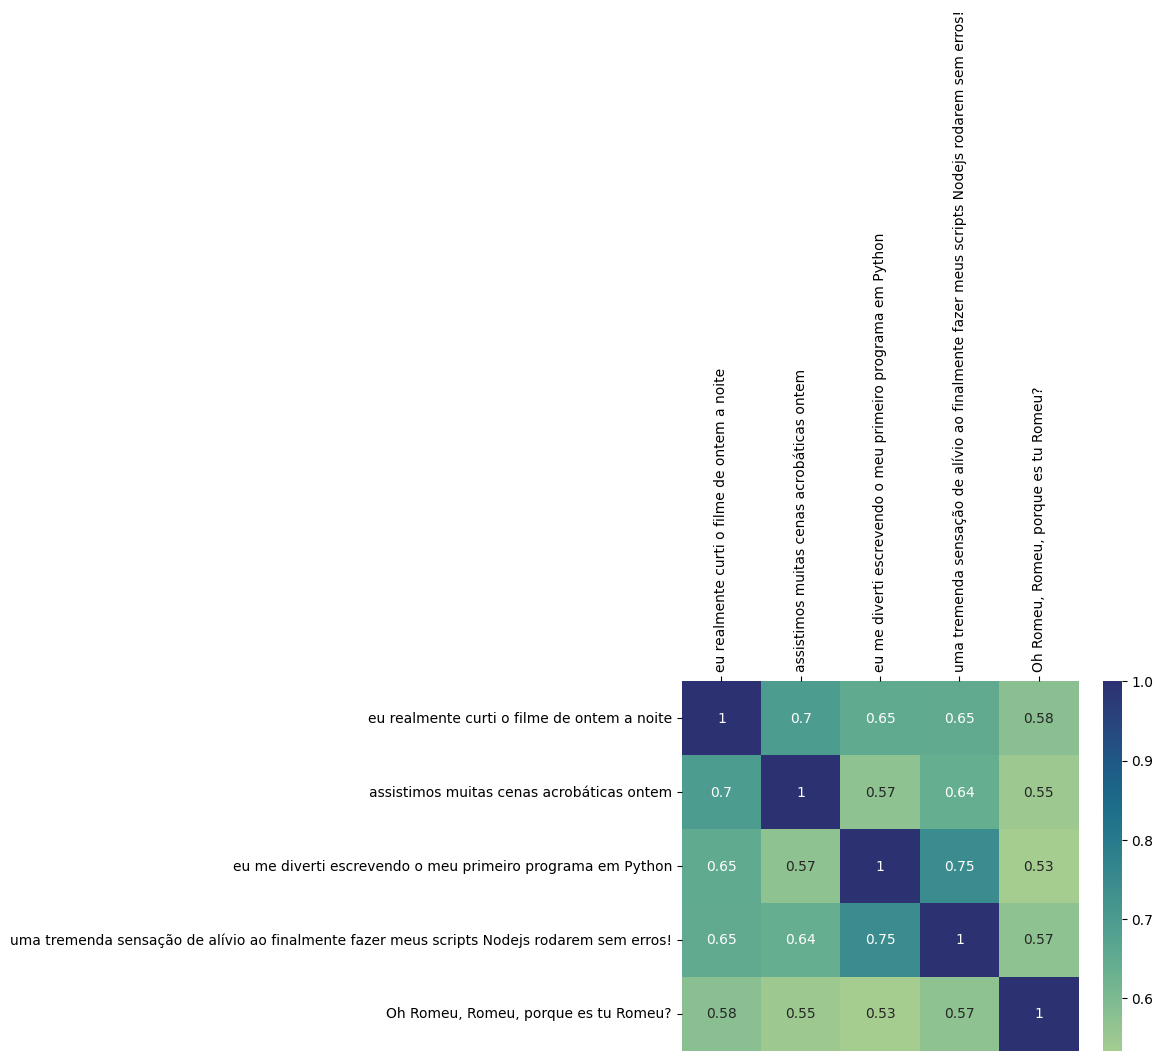

In [37]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)